In [ ]:
from sklearn.datasets import fetch_lfw_people

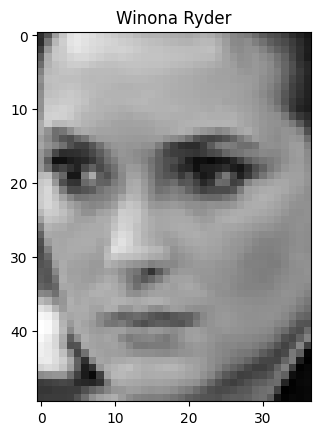

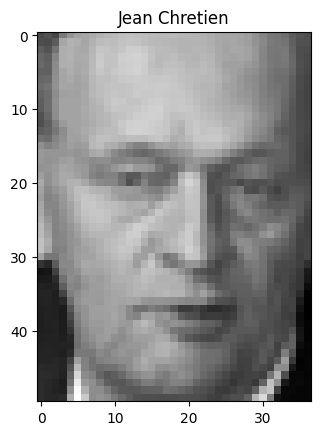

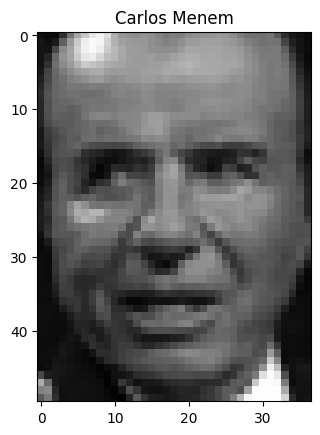

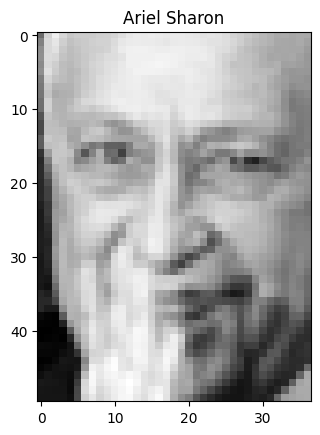

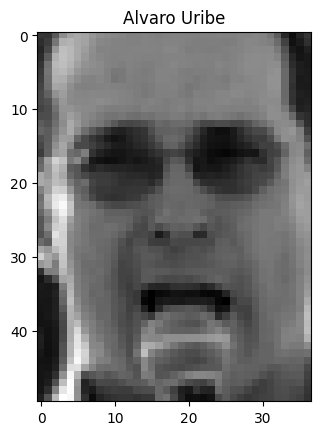

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# load data
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

# bring name
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# first five
for i in range(5):
    plt.imshow(lfw_people.images[i], cmap=plt.cm.gray)
    plt.title(target_names[y[i]])
    plt.show()


In [3]:
faces = fetch_lfw_people(min_faces_per_person=70,resize=0.4)
n_samples , h , w = faces.images.shape
x = faces.data
y = faces.target
print(faces.target_names)## 7 peoples names
print(faces.images.shape)## 1288 images, 50x37 image pixcel

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [6]:
from sklearn.decomposition import PCA
n_components = 150 #shinking 1850dmi (50x37) to 150 dim
pca = PCA(n_components=n_components , svd_solver='randomized' , whiten=True).fit(xtrain)
eigenfaces = pca.components_.reshape(n_components,h,w)
xtrain_pca = pca.transform(xtrain)
xtest_pca = pca.transform(xtest)

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3,5e3,1e4,5e4,1e5],'gamma' : [1e-4,1e-3,1e-2,1e-1,1e-0]} #trying various C (error) and gamma num.

clf = GridSearchCV(SVC(kernel = 'rbf',class_weight='balanced'),param_grid,cv=5)
clf.fit(xtrain_pca,ytrain)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [11]:
print(clf.best_params_)#printing the best param
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.001}
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [14]:
ytest_pred = clf.predict(xtest_pca)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ytest_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.88      0.82        16
     Colin Powell       0.67      0.84      0.75        49
  Donald Rumsfeld       0.89      0.67      0.76        36
    George W Bush       0.85      0.88      0.86       145
Gerhard Schroeder       0.75      0.68      0.71        22
      Hugo Chavez       0.86      0.57      0.69        21
       Tony Blair       0.84      0.79      0.81        33

         accuracy                           0.81       322
        macro avg       0.80      0.76      0.77       322
     weighted avg       0.82      0.81      0.81       322

